In [1]:
! pip install -U imbalanced-learn

In [3]:
import numpy as np
import pandas as pd
import logging
import pickle

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/project course/FraudData/PS_20174392719_1491204439457_log.csv', index_col=False)

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
6362615,False
6362616,False
6362617,False
6362618,False


In [10]:
label_count = df.isFraud.value_counts()
print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])

Class 0 :  6354407
Class 1 :  8213


<Axes: ylabel='count'>

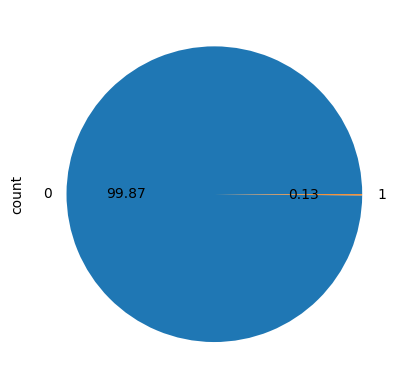

In [11]:
# Show pie plot (Approach 1)
label_count.plot.pie(autopct='%.2f')

In [12]:
c_class_0, c_class_1 = df.isFraud.value_counts()

x= df[df['isFraud']==0]
y= df[df['isFraud']==1]

<Axes: title={'center': 'Under Sampling'}, ylabel='count'>

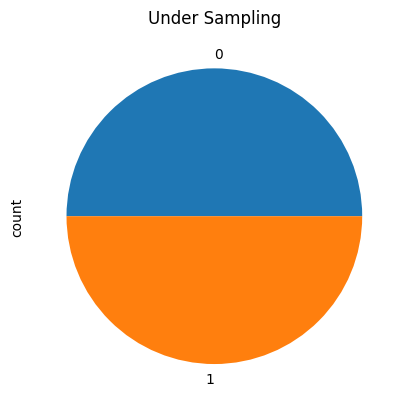

In [13]:
data_class_0_under = x.sample(c_class_1)
# Here we are reducing the number of records with 0 as label to that of number of records equal to 1
# Pandas sample() is used to randomly select passed number of records

data_test_under = pd.concat([data_class_0_under, y], axis=0)
#Concatening the data one after the other to create one single dataframe containing all the data

data_test_under.isFraud.value_counts().plot(kind='pie',title='Under Sampling')

In [14]:
data_test_under.shape

(16426, 11)

In [15]:
data_test_under

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1550848,154,CASH_OUT,50167.58,C806810956,0.00,0.00,C91446082,735206.17,1093288.30,0,0
3124988,236,CASH_OUT,161393.31,C1174617103,0.00,0.00,C169885259,646001.26,807394.57,0,0
1472369,141,PAYMENT,2287.70,C1915488562,61064.31,58776.61,M1405464652,0.00,0.00,0,0
5055118,354,PAYMENT,19026.82,C355131356,407421.68,388394.86,M1943788251,0.00,0.00,0,0
5814749,401,CASH_IN,254642.00,C2046213988,171.00,254813.00,C1364973619,516711.71,262069.71,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [16]:
data_test_under.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,306.282540,8.251381e+05,1.211433e+06,4.943464e+05,8.088429e+05,1.243352e+06,0.500000,0.000974
std,193.485616,1.868327e+06,3.171422e+06,2.386875e+06,3.214700e+06,3.648793e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.662014e+04,1.063025e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,1.718783e+05,1.203851e+05,0.000000e+00,0.000000e+00,1.213165e+05,0.500000,0.000000
75%,409.000000,5.423939e+05,7.882846e+05,0.000000e+00,5.207520e+05,1.097662e+06,1.000000,0.000000
max,743.000000,2.914677e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


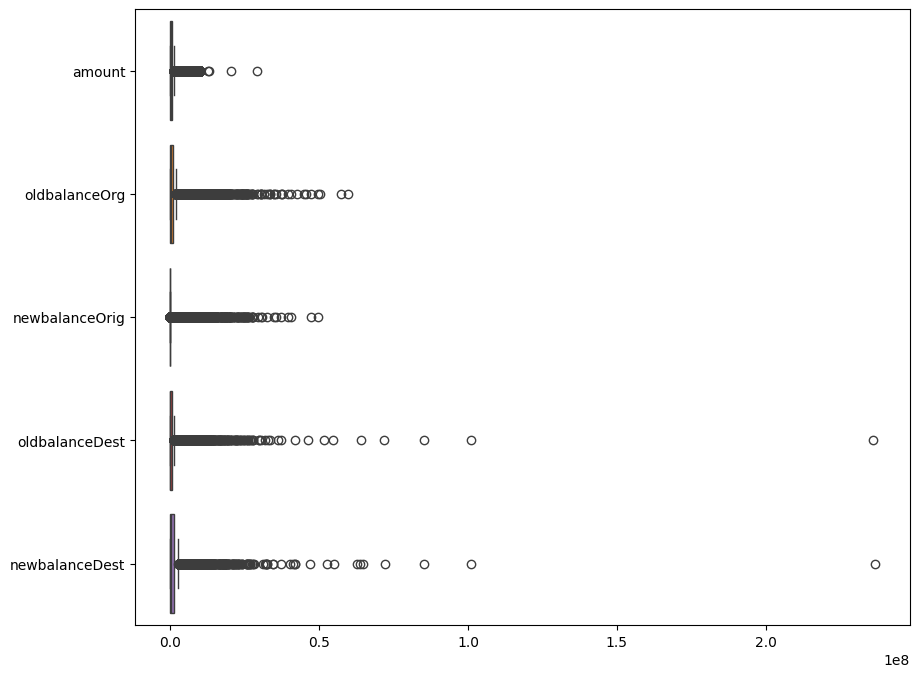

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
sns.boxplot(data=data_test_under[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [18]:
upper_limit=data_test_under["oldbalanceDest"].mean()+3*data_test_under["oldbalanceDest"].std()
upper_limit

10452943.390989192

In [19]:
lower_limit=data_test_under["oldbalanceDest"].mean()-3*data_test_under["oldbalanceDest"].std()
lower_limit

-8835257.557310876

In [20]:
data_test_under[(data_test_under.oldbalanceDest>upper_limit) | (data_test_under.oldbalanceDest<lower_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5759666,400,CASH_OUT,36633.44,C1939778186,0.00,0.00,C208507246,10592298.85,10628932.30,0,0
698545,36,CASH_OUT,104195.49,C2079699941,0.00,0.00,C214774813,26074595.22,26178790.72,0,0
2896855,228,CASH_OUT,325998.05,C2129463655,0.00,0.00,C1041664164,10718403.89,11044401.94,0,0
2905211,228,CASH_IN,119327.15,C583856791,137783.00,257110.15,C1861827552,15340777.70,15221450.55,0,0
5191830,369,CASH_OUT,136582.75,C2048299377,29712.00,0.00,C850219646,22567630.73,22704213.49,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6351127,698,CASH_OUT,748726.81,C714886527,748726.81,0.00,C522001237,36292626.28,37041353.09,1,0
6351183,699,CASH_OUT,215013.30,C802509612,215013.30,0.00,C1827355513,17301734.96,17516748.26,1,0
6353885,707,CASH_OUT,226402.77,C1750520522,226402.77,0.00,C1625988105,11791909.20,12018311.97,1,0
6362339,720,CASH_OUT,79039.81,C838045354,79039.81,0.00,C1980653895,11270532.70,11349572.51,1,0


In [21]:
data_test_under=data_test_under[(data_test_under.oldbalanceDest<upper_limit) & (data_test_under.oldbalanceDest>lower_limit)]
data_test_under.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1550848,154,CASH_OUT,50167.58,C806810956,0.00,0.00,C91446082,735206.17,1093288.30,0,0
3124988,236,CASH_OUT,161393.31,C1174617103,0.00,0.00,C169885259,646001.26,807394.57,0,0
1472369,141,PAYMENT,2287.70,C1915488562,61064.31,58776.61,M1405464652,0.00,0.00,0,0
5055118,354,PAYMENT,19026.82,C355131356,407421.68,388394.86,M1943788251,0.00,0.00,0,0
5814749,401,CASH_IN,254642.00,C2046213988,171.00,254813.00,C1364973619,516711.71,262069.71,0,0


In [22]:
upper_limit2=data_test_under["newbalanceDest"].mean()+3*data_test_under["newbalanceDest"].std()
upper_limit2

7158821.8676181855

In [23]:
lower_limit2=data_test_under["newbalanceDest"].mean()-3*data_test_under["newbalanceDest"].std()
lower_limit2

-5118481.561763867

In [24]:
data_test_under[(data_test_under.newbalanceDest>upper_limit2) | (data_test_under.newbalanceDest<lower_limit2)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4284135,307,CASH_OUT,98548.91,C1165343325,0.00,0.00,C1443885742,7267093.49,7365642.40,0,0
5702302,398,CASH_IN,469622.83,C1844032157,7790268.02,8259890.85,C1537375322,8868699.07,8399076.24,0,0
2337106,189,CASH_IN,236159.44,C293778455,445739.15,681898.59,C1979121360,9928700.82,9692541.38,0,0
4615068,329,CASH_IN,448389.85,C395330783,1816085.58,2264475.42,C229044826,8718432.76,8270042.91,0,0
2579670,207,CASH_IN,95922.54,C957936722,7602.00,103524.54,C1570076320,8999795.36,8903872.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362577,741,CASH_OUT,10000000.00,C421958672,10000000.00,0.00,C2034016962,0.00,10000000.00,1,0
6362579,741,CASH_OUT,10000000.00,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362581,741,CASH_OUT,10000000.00,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362583,741,CASH_OUT,10000000.00,C1668034607,10000000.00,0.00,C1250722530,192912.98,10192912.98,1,0


In [25]:
data_test_under=data_test_under[(data_test_under.newbalanceDest<upper_limit2) & (data_test_under.newbalanceDest>lower_limit2)]
data_test_under.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1550848,154,CASH_OUT,50167.58,C806810956,0.00,0.00,C91446082,735206.17,1093288.30,0,0
3124988,236,CASH_OUT,161393.31,C1174617103,0.00,0.00,C169885259,646001.26,807394.57,0,0
1472369,141,PAYMENT,2287.70,C1915488562,61064.31,58776.61,M1405464652,0.00,0.00,0,0
5055118,354,PAYMENT,19026.82,C355131356,407421.68,388394.86,M1943788251,0.00,0.00,0,0
5814749,401,CASH_IN,254642.00,C2046213988,171.00,254813.00,C1364973619,516711.71,262069.71,0,0


In [26]:
upper_limit3=data_test_under["oldbalanceOrg"].mean()+3*data_test_under["oldbalanceOrg"].std()
upper_limit3

10164786.475572148

In [27]:
lower_limit3=data_test_under["oldbalanceOrg"].mean()-3*data_test_under["oldbalanceOrg"].std()
lower_limit3

-8019315.363358261

In [28]:
data_test_under[(data_test_under.oldbalanceOrg>upper_limit3) | (data_test_under.oldbalanceOrg<lower_limit3)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2206155,186,CASH_IN,90115.78,C2138475164,19741625.11,19831740.89,C1624866300,90537.01,421.23,0,0
3053685,234,CASH_IN,371198.86,C1312779452,12525600.71,12896799.58,C1746523349,558521.49,187322.62,0,0
5485267,379,CASH_IN,103946.41,C1181378084,11357282.34,11461228.74,C1697783170,1317565.88,1213619.47,0,0
1364680,138,CASH_IN,65122.07,C389333444,14293636.62,14358758.70,C723719877,613525.55,302467.52,0,0
789233,40,CASH_IN,4603.39,C379163656,19497437.92,19502041.31,C1135523296,357580.49,352977.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362528,736,TRANSFER,10000000.00,C412961249,11314660.84,1314660.84,C253674970,0.00,0.00,1,0
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0


In [29]:
data_test_under=data_test_under[(data_test_under.oldbalanceOrg<upper_limit3) & (data_test_under.oldbalanceOrg>lower_limit3)]
data_test_under.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1550848,154,CASH_OUT,50167.58,C806810956,0.00,0.00,C91446082,735206.17,1093288.30,0,0
3124988,236,CASH_OUT,161393.31,C1174617103,0.00,0.00,C169885259,646001.26,807394.57,0,0
1472369,141,PAYMENT,2287.70,C1915488562,61064.31,58776.61,M1405464652,0.00,0.00,0,0
5055118,354,PAYMENT,19026.82,C355131356,407421.68,388394.86,M1943788251,0.00,0.00,0,0
5814749,401,CASH_IN,254642.00,C2046213988,171.00,254813.00,C1364973619,516711.71,262069.71,0,0


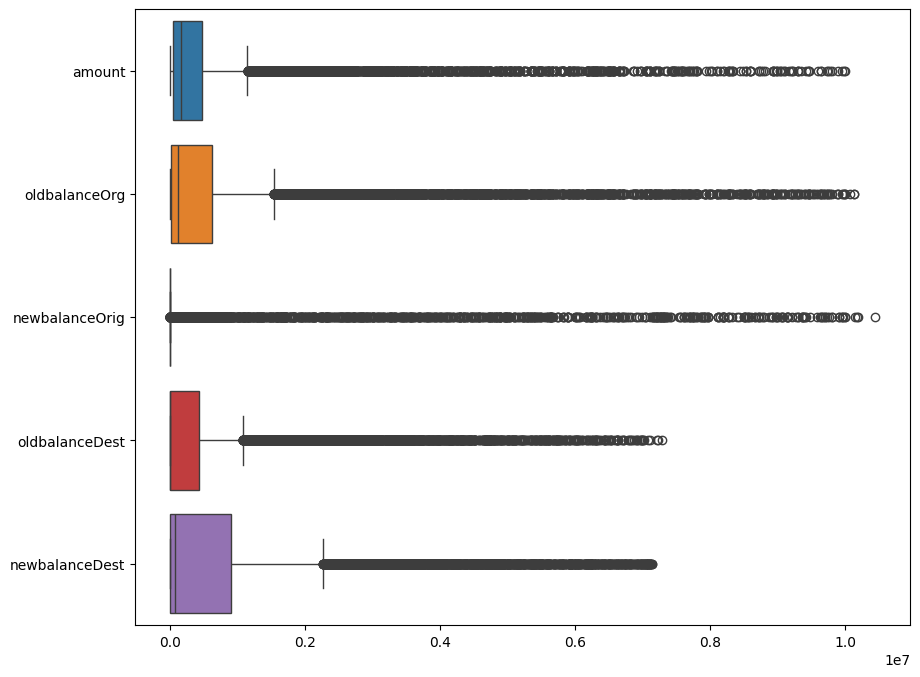

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data_test_under[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [31]:
data_test_under["type"].value_counts()

,count
type,
CASH_OUT,6392
TRANSFER,4577
PAYMENT,2810
CASH_IN,1607
DEBIT,44


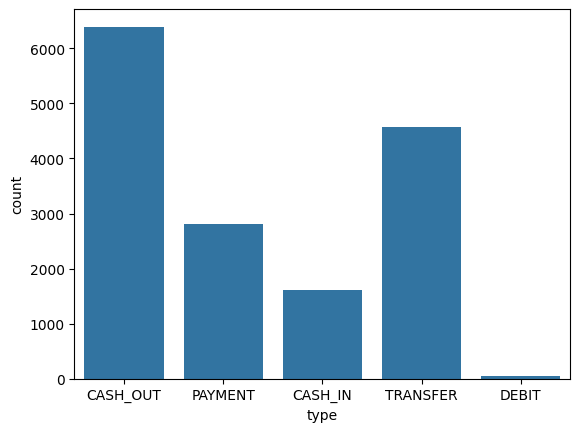

In [32]:
sns.countplot(x="type",data=data_test_under)
plt.show()

In [33]:
data_test_under["isFraud"].value_counts()

,count
isFraud,
0,7794
1,7636


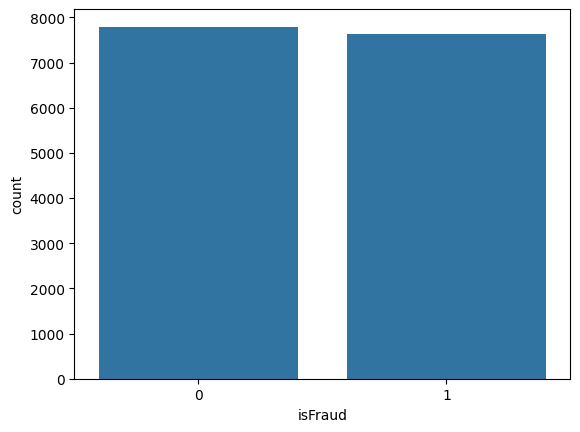

In [34]:
sns.countplot(x="isFraud",data=data_test_under)
plt.show()

In [35]:
data_test_under["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,15420
1,10


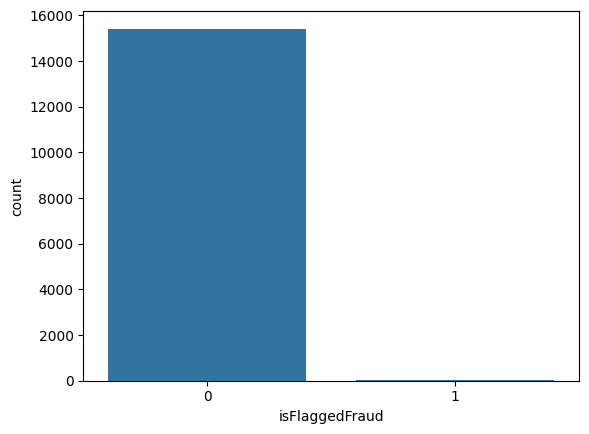

In [36]:
sns.countplot(x="isFlaggedFraud",data=data_test_under)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=25, random_state=0)

In [38]:
data_test_under.drop(columns=["nameOrig","nameDest"],axis=1,inplace=True)

In [39]:
data_test_under = pd.get_dummies(data_test_under, columns=['type'], drop_first=True)

In [40]:
bool_columns = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
data_test_under[bool_columns] = data_test_under[bool_columns].astype(int)

data_test_under.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1550848,154,50167.58,0.00,0.00,735206.17,1093288.30,0,0,1,0,0,0
3124988,236,161393.31,0.00,0.00,646001.26,807394.57,0,0,1,0,0,0
1472369,141,2287.70,61064.31,58776.61,0.00,0.00,0,0,0,0,1,0
5055118,354,19026.82,407421.68,388394.86,0.00,0.00,0,0,0,0,1,0
5814749,401,254642.00,171.00,254813.00,516711.71,262069.71,0,0,0,0,0,0


In [41]:
scale_data=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_test_under[scale_data] = scaler.fit_transform(data_test_under[scale_data])

In [42]:
train_data=data_test_under.drop(columns="isFraud",axis=1)
label_data=data_test_under["isFraud"]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.25, random_state=0)

In [44]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predict=model.predict(X_test)

In [46]:
print(f"Accuracy score : {accuracy_score(y_test,predict)}")

Accuracy score : 0.9898911353032659


In [47]:
label=["Non Fraud","Fraud"]

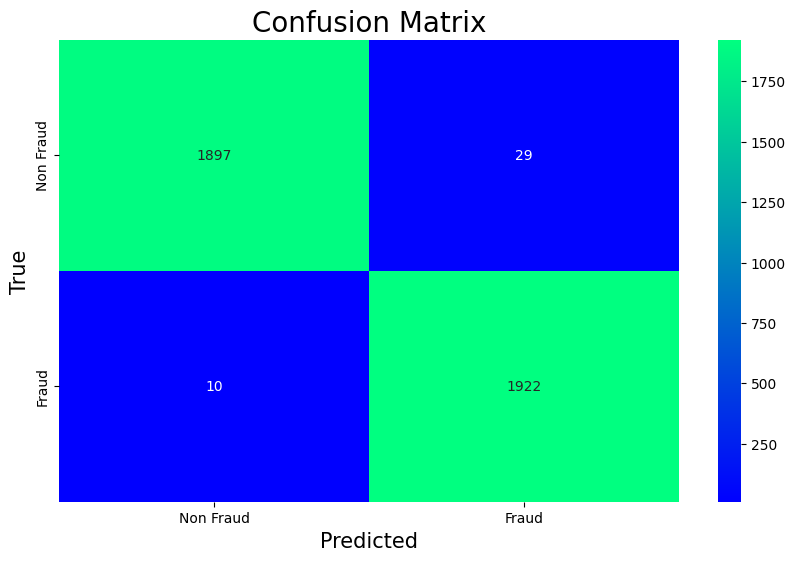

In [48]:
cf_matrix=confusion_matrix(y_test,predict)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix,annot=True,fmt="d",xticklabels=label,yticklabels=label,cmap="winter")
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("True",fontsize=15)
plt.title("Confusion Matrix",fontsize=20)
plt.show()

In [49]:
print(classification_report(y_test,predict,target_names=label))

              precision    recall  f1-score   support

   Non Fraud       0.99      0.98      0.99      1926
       Fraud       0.99      0.99      0.99      1932

    accuracy                           0.99      3858
   macro avg       0.99      0.99      0.99      3858
weighted avg       0.99      0.99      0.99      3858



In [50]:
import joblib
joblib.dump(model, 'FraudMoodel.pkl')

['FraudMoodel.pkl']

In [51]:
import joblib
loaded_model = joblib.load('/content/drive/MyDrive/project course/FraudData/FraudMoodel.pkl')

In [52]:
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6194192,572,1.162059,0.810287,-0.223661,-0.460888,-0.565109,0,0,0,0,1
2520726,205,-0.478055,-0.420955,-0.148087,-0.460888,-0.565109,0,0,0,1,0
267907,15,-0.462213,-0.474588,-0.223661,-0.460888,-0.565109,0,0,0,1,0
4929414,350,-0.413943,-0.482058,-0.223661,3.704925,2.793228,0,1,0,0,0
1030341,58,4.873112,3.717397,-0.223661,-0.460888,-0.565109,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5714284,398,-0.423576,2.316909,3.796130,0.019451,-0.244495,0,0,0,0,0
1073710,129,2.229943,-0.446762,-0.223661,1.306800,3.324919,0,0,0,0,1
4228363,306,-0.475201,-0.419021,-0.148512,-0.460888,-0.565109,0,0,0,1,0
3937523,286,-0.459487,1.147308,2.106298,5.481323,4.102927,0,0,0,0,0


In [53]:
feature_names= ['step',	'amount',	'oldbalanceOrg', 'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT',	'type_DEBIT',	'type_PAYMENT',	'type_TRANSFER']

In [54]:
import numpy as np
X_test_array = X_test.to_numpy(dtype=float)
print(X_test_array.shape)

(3858, 11)


In [55]:
# Simulate getting a new transaction input
def get_new_transaction():

    return X_test_array

In [56]:
input_data = pd.DataFrame({
    "step":[1],
    "amount":[150],
    "oldbalanceOrg":[92852.00],
    "newbalanceOrig":[7679741.48],
    "oldbalanceDest":[16428780.87],
    "newbalanceDest":[19169204.93],
    "isFlaggedFraud":[0],
    "type_CASH_OUT":[0],
    "type_DEBIT":[0],
    "type_PAYMENT":[1],
    "type_TRANSFER":[0]
})

prediction = loaded_model.predict(input_data)

In [57]:
# Retrieve feature names from training data
feature_names = X_train.columns.tolist()
feature_names

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER']

In [58]:
# Define a function to predict fraud
def predict_fraud(transaction_features):
    # Convert the input to a DataFrame with correct feature names
    input_data = pd.DataFrame([transaction_features], columns=feature_names)

    # Make a prediction
    prediction = model.predict(input_data)

    # Map the prediction back to labels
    return "Fraud" if prediction[0] == 1 else "Non Fraud"

# Example of transaction features (replace with actual features as per your dataset)
# Ensure the order and the number of features match those used for training
transaction_example = {
    "step":1,
    "amount":150,
    "oldbalanceOrg": 92852.00	,
    "newbalanceOrig":7679741.48,
    "oldbalanceDest":16428780.87,
    "newbalanceDest":19169204.93,
    "type_CASH_OUT": 0,
    "type_DEBIT": 0,
    "type_PAYMENT": 1,
    "type_TRANSFER": 0,
    "isFlaggedFraud":0
}
# Predicting if the example transaction is fraud or not
result = predict_fraud(transaction_example)
print(f"The transaction is: {result}")

The transaction is: Non Fraud


In [59]:
# Define a function to predict fraud
def predict_fraud(transaction_features):
    # Convert the input to a DataFrame with correct feature names
    input_data = pd.DataFrame([transaction_features], columns=feature_names)

    # Make a prediction
    prediction = model.predict(input_data)

    # Map the prediction back to labels
    return "Fraud" if prediction[0] == 1 else "Non Fraud"

# Example of transaction features (replace with actual features as per your dataset)
# Ensure the order and the number of features match those used for training
transaction_example = {
    "step":736,
    "amount":10000000.00,
    "oldbalanceOrg": 11314660.84	,
    "newbalanceOrig":1314660.84,
    "oldbalanceDest":0.00,
    "newbalanceDest":0.00,
    "type_CASH_OUT": 0,
    "type_DEBIT": 0,
    "type_PAYMENT": 0,
    "type_TRANSFER": 1,
    "isFlaggedFraud":0
}

# Predicting if the example transaction is fraud or not
result = predict_fraud(transaction_example)
print(f"The transaction is: {result}")

The transaction is: Fraud
